## Diabetes Prediction using ML

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sum
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [7]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: >

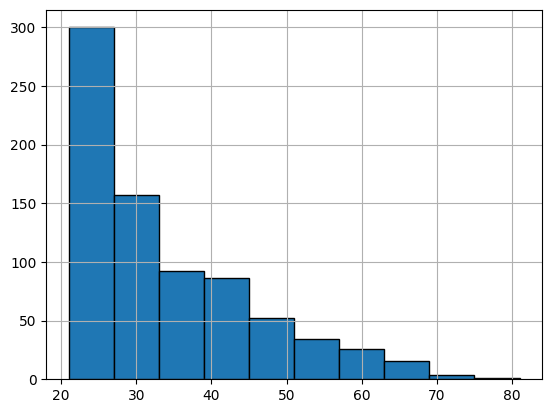

In [8]:
df['Age'].hist(edgecolor='black')

In [9]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: xlabel='BMI', ylabel='Count'>

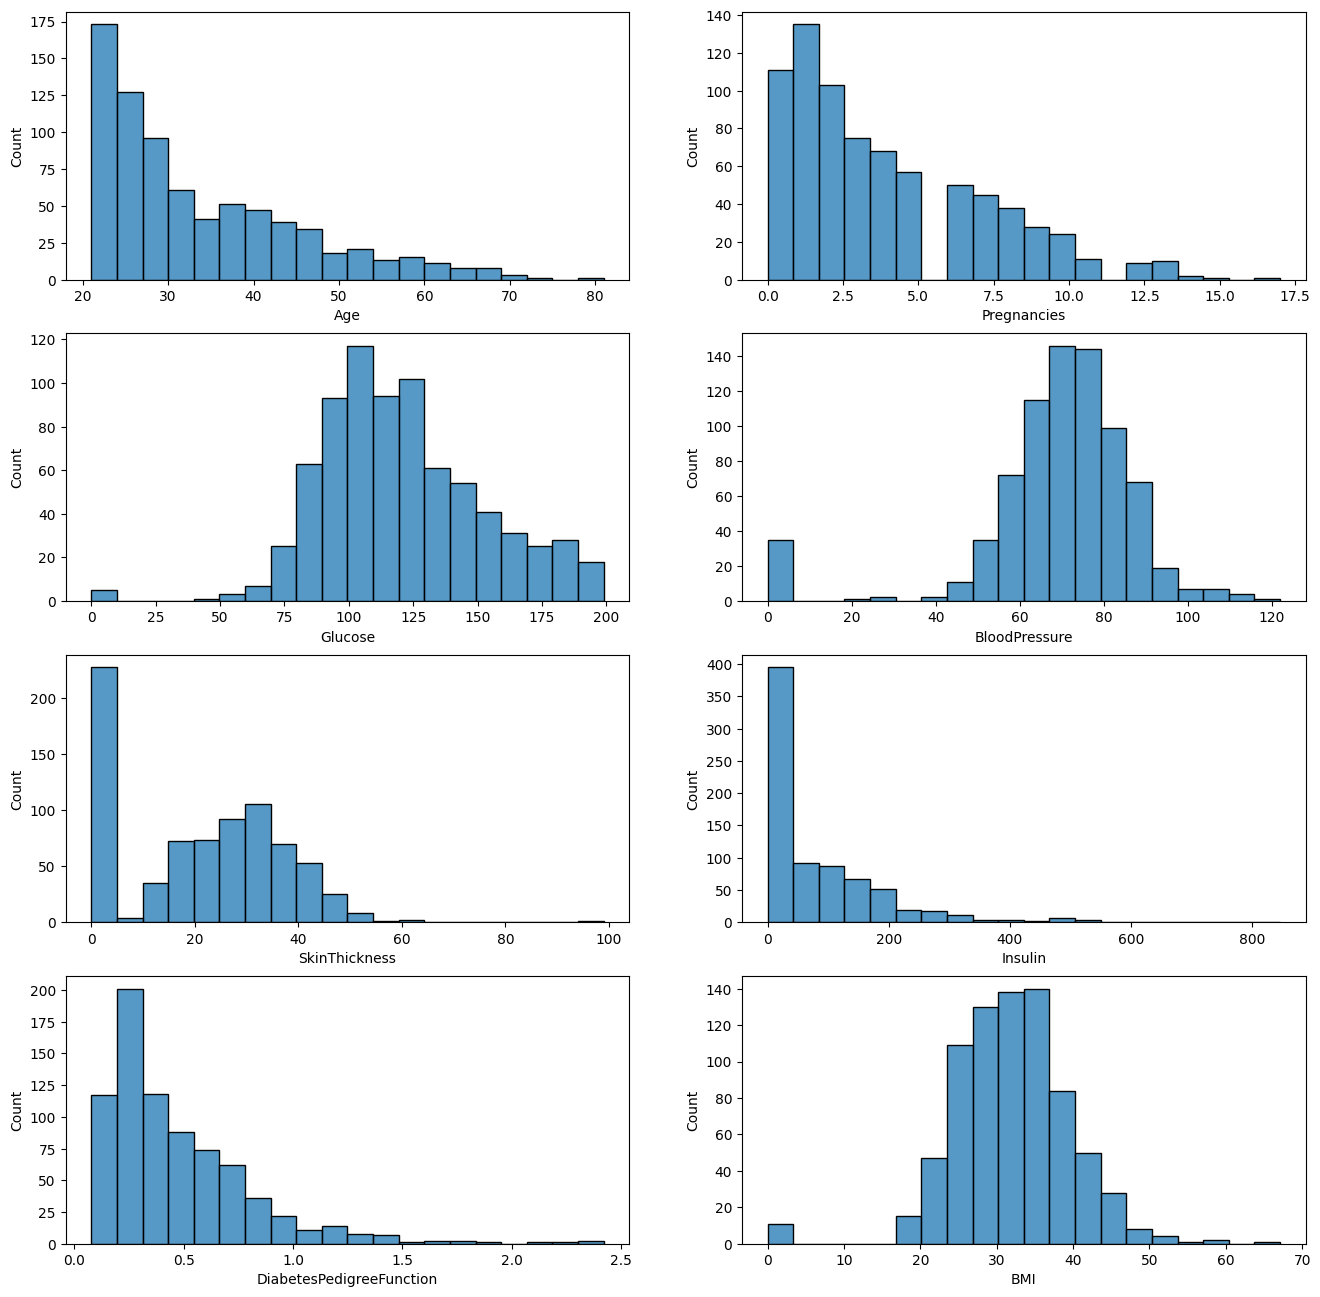

In [10]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.histplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.histplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.histplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.histplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.histplot(df.BMI, bins = 20, ax=ax[3,1]) 

In [11]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [12]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [13]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [14]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [15]:

df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


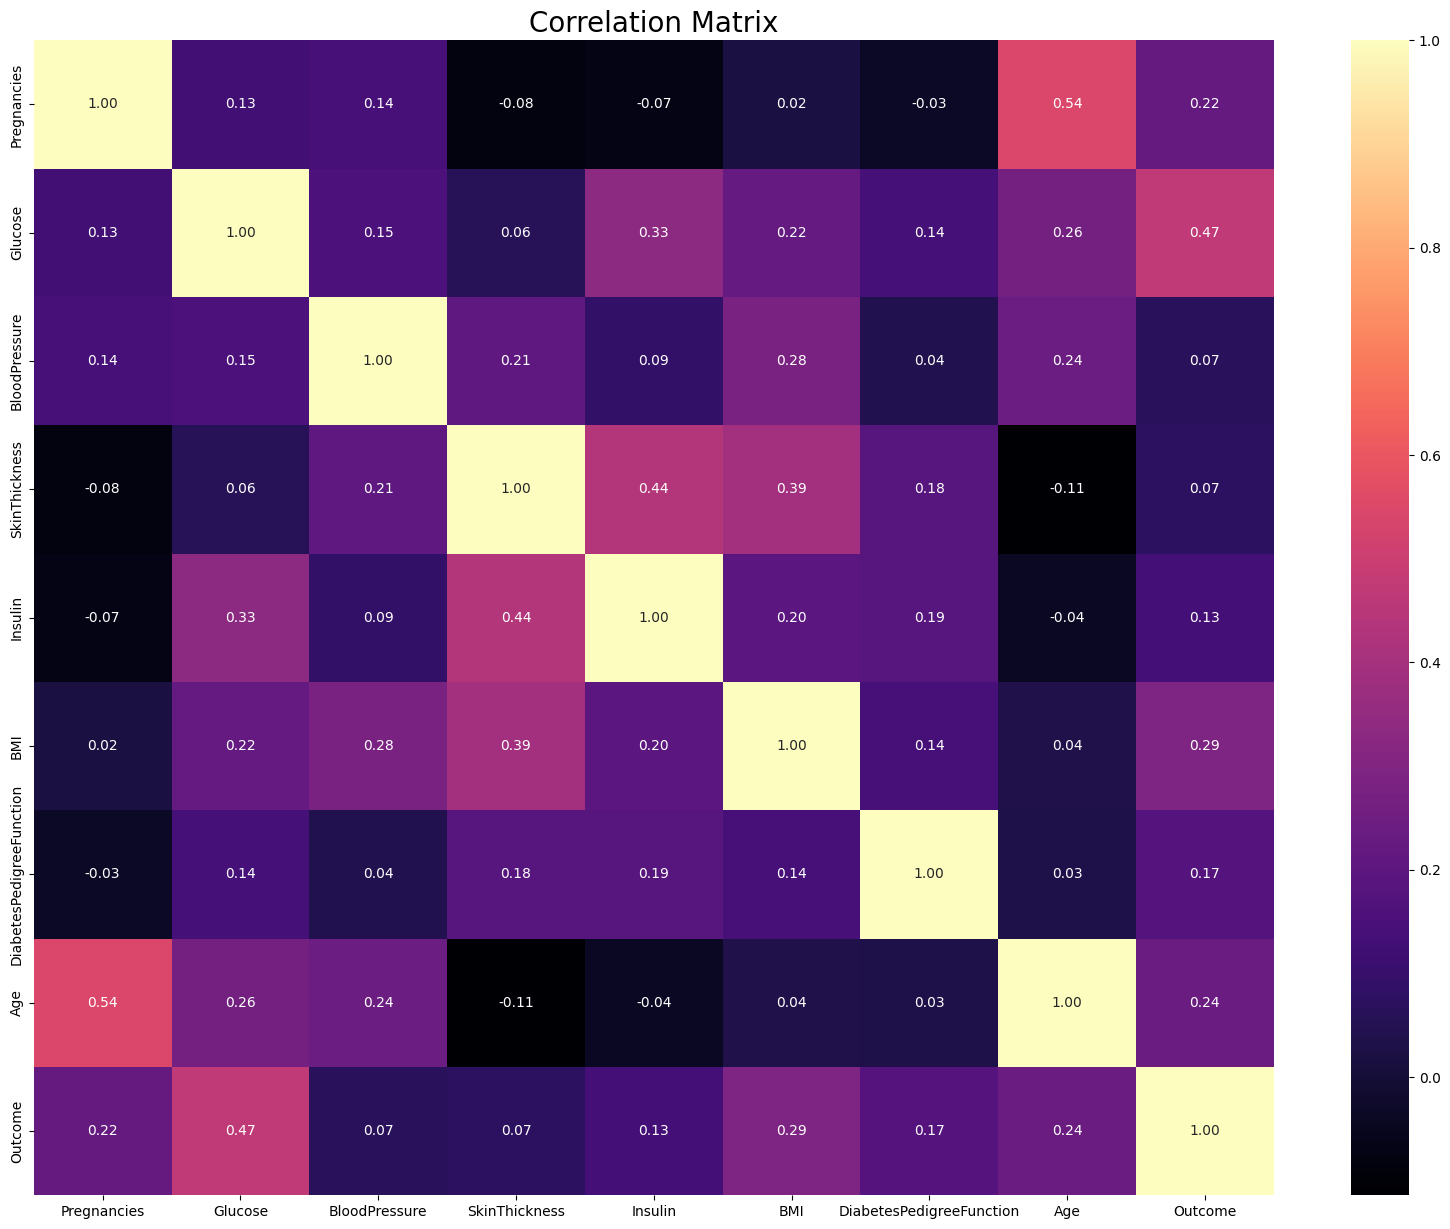

In [17]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [18]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [20]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

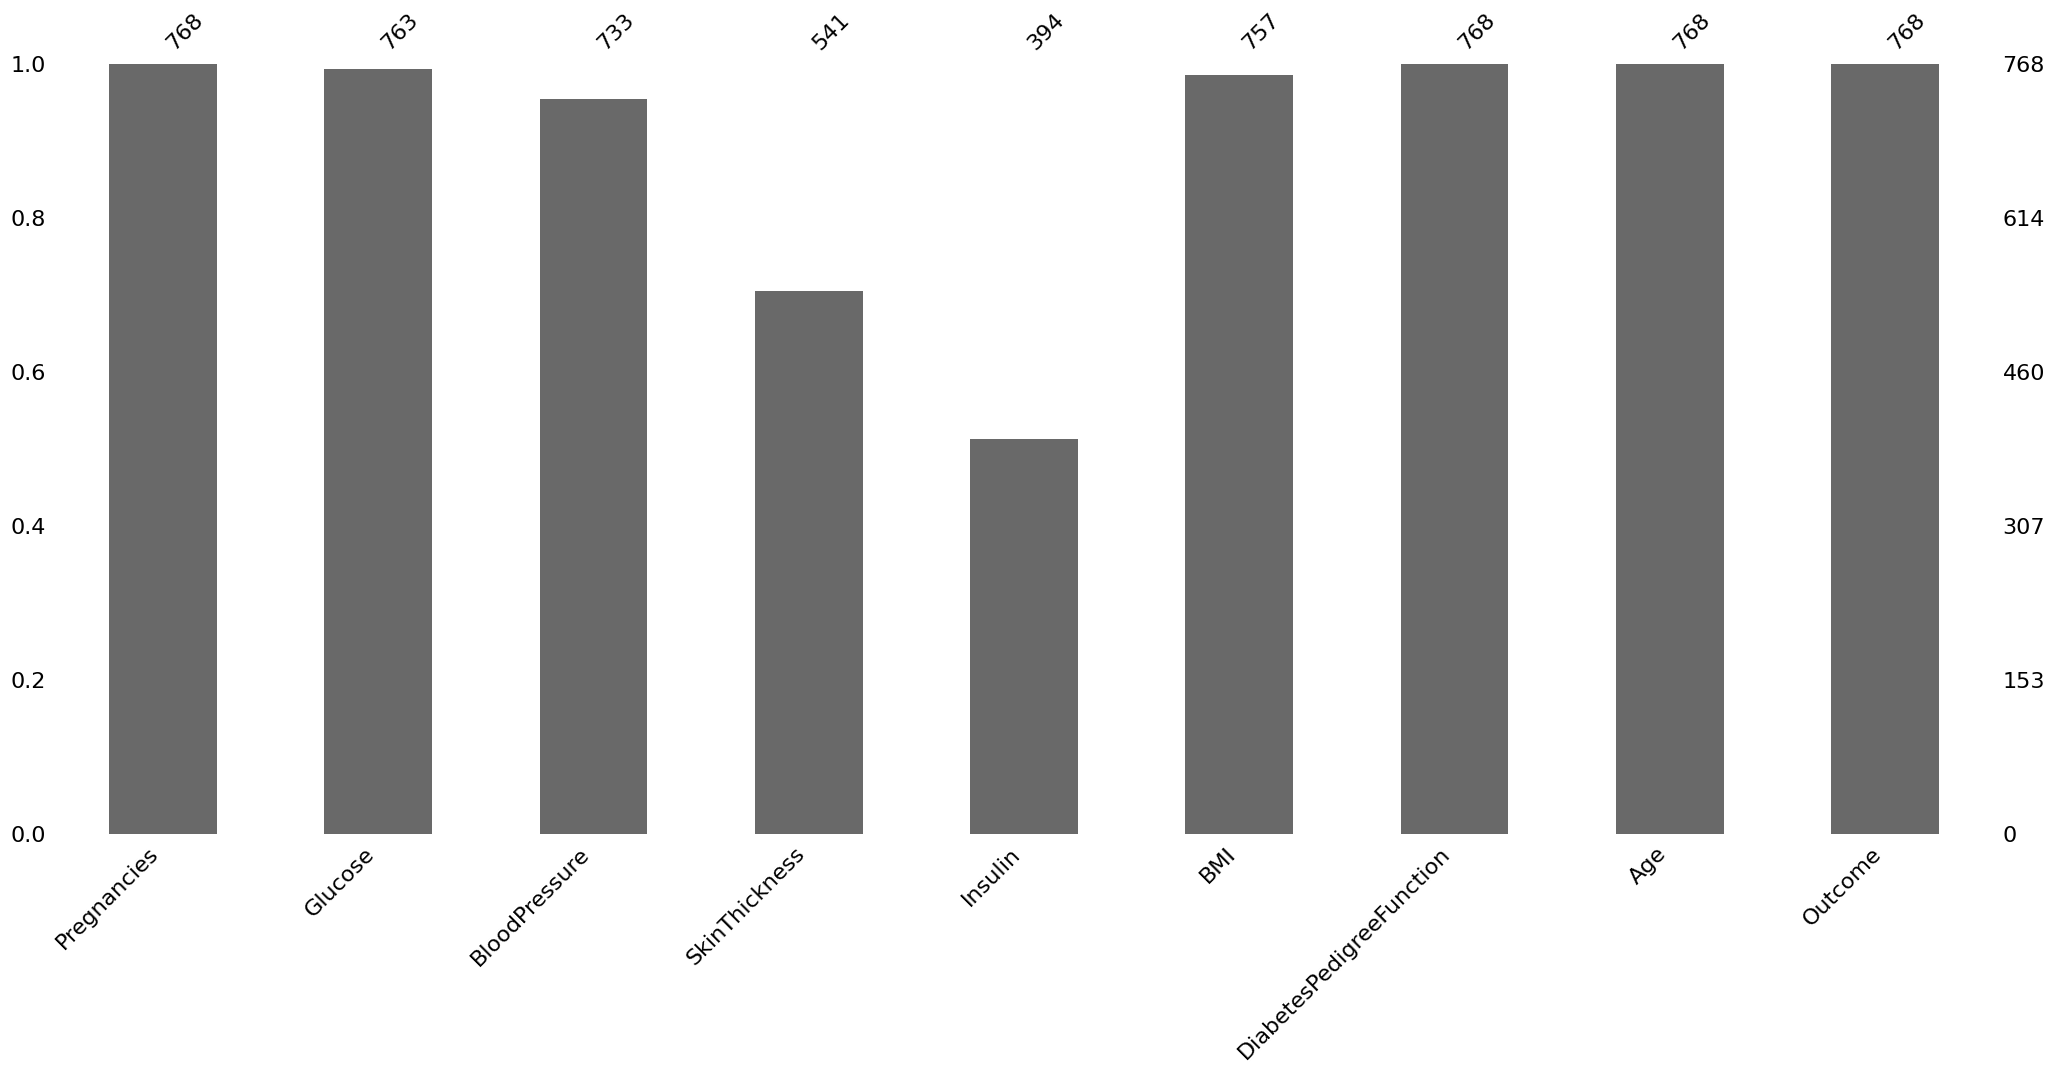

In [21]:
import missingno as msno
msno.bar(df)

In [22]:
#replace/fill missing values with median

def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [23]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Insulin'>

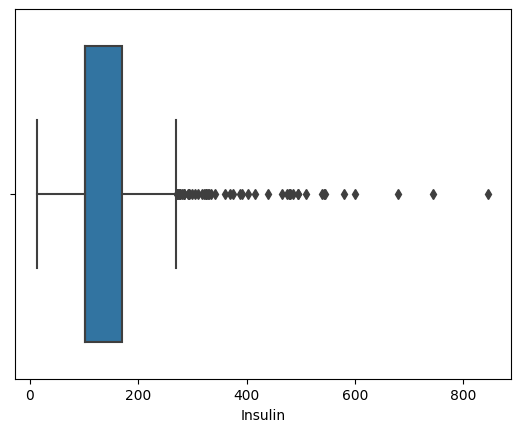

In [26]:
sns.boxplot(x=df['Insulin'])

In [27]:
#suppress contradictory values

q1 = df.Insulin.quantile(0.25)
q3 = df.Insulin.quantile(0.75)
IQR = q3-q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

<Axes: xlabel='Insulin'>

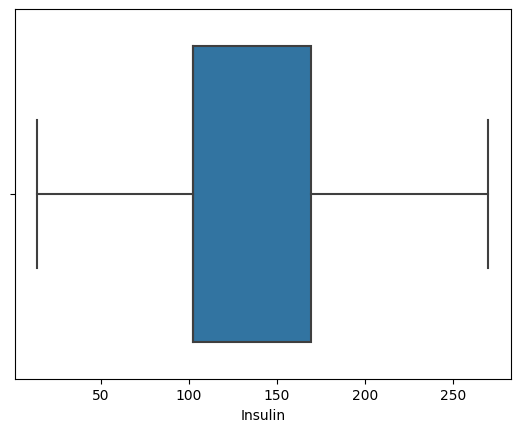

In [28]:
sns.boxplot(x=df['Insulin'])

In [29]:
#local outlier factor

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df)

array([ 1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [30]:
df_scores = clf.negative_outlier_factor_
scores=pd.DataFrame(np.sort(df_scores)[0:30])

In [31]:
threshold =np.sort(df_scores)[7]
threshold

-1.7329158673556193

In [32]:
#delete higher than threshold

outlier=df_scores>threshold
df=df[outlier]

In [33]:
df.shape

(760, 9)

### Feature Engineering

In [34]:
#Creating new variables for models.

newBMI=pd.Series(["Underweight","Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["newBMI"]=newBMI
df.loc[df["BMI"] < 18.5, "newBMI"] = newBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "newBMI"] = newBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "newBMI"] = newBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "newBMI"] = newBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "newBMI"] = newBMI[4]
df.loc[df["BMI"] > 39.9 ,"newBMI"] = newBMI[5]

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,newBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [37]:
def set_insulin(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else: return "Abnormal"

In [38]:
#add to the dataframe
df=df.assign(newInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,newBMI,newInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [39]:
newGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["newGlucose"] = newGlucose
df.loc[df["Glucose"] <= 70, "newGlucose"] = newGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "newGlucose"] = newGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "newGlucose"] = newGlucose[2]
df.loc[df["Glucose"] > 126 ,"newGlucose"] = newGlucose[3]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,newBMI,newInsulinScore,newGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [40]:
#converting categorixal variables to numerical

df=pd.get_dummies(df, columns=["newBMI", "newInsulinScore", "newGlucose"], drop_first=True).replace({True: 1, False: 0})

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,newBMI_Obesity 1,newBMI_Obesity 2,newBMI_Obesity 3,newBMI_Overweight,newBMI_Underweight,newInsulinScore_Normal,newGlucose_Low,newGlucose_Normal,newGlucose_Overweight,newGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [42]:
categorical_df = df[['newBMI_Obesity 1','newBMI_Obesity 2', 'newBMI_Obesity 3', 'newBMI_Overweight','newBMI_Underweight','newInsulinScore_Normal','newGlucose_Low','newGlucose_Normal', 'newGlucose_Overweight', 'newGlucose_Secret']]
categorical_df.head()

,newBMI_Obesity 1,newBMI_Obesity 2,newBMI_Obesity 3,newBMI_Overweight,newBMI_Underweight,newInsulinScore_Normal,newGlucose_Low,newGlucose_Normal,newGlucose_Overweight,newGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [43]:
y=df["Outcome"]
X=df.drop(["Outcome", 'newBMI_Obesity 1','newBMI_Obesity 2', 'newBMI_Obesity 3', 'newBMI_Overweight','newBMI_Underweight','newInsulinScore_Normal','newGlucose_Low','newGlucose_Normal', 'newGlucose_Overweight', 'newGlucose_Secret'], axis=1)
cols=X.columns
index=X.index


In [44]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [45]:
from sklearn.preprocessing import RobustScaler

In [46]:
#standardization
transformer=RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns=cols, index=index)

In [47]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.770186,0.000,1.000000,1.000000,0.173184,0.669707,1.235294
1,-0.4,-0.795031,-0.375,0.142857,0.000000,-0.608939,-0.049511,0.117647
2,1.0,1.639752,-0.500,0.571429,1.000000,-0.977654,0.786971,0.176471
3,-0.4,-0.695652,-0.375,-0.714286,-0.126866,-0.441341,-0.528990,-0.470588
4,-0.6,0.496894,-2.000,1.000000,0.977612,1.234637,4.998046,0.235294


In [48]:
X=pd.concat([X, categorical_df], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,newBMI_Obesity 1,newBMI_Obesity 2,newBMI_Obesity 3,newBMI_Overweight,newBMI_Underweight,newInsulinScore_Normal,newGlucose_Low,newGlucose_Normal,newGlucose_Overweight,newGlucose_Secret
0,0.6,0.770186,0.000,1.000000,1.000000,0.173184,0.669707,1.235294,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.795031,-0.375,0.142857,0.000000,-0.608939,-0.049511,0.117647,0,0,0,1,0,1,0,1,0,0
2,1.0,1.639752,-0.500,0.571429,1.000000,-0.977654,0.786971,0.176471,0,0,0,0,0,0,0,0,0,1
3,-0.4,-0.695652,-0.375,-0.714286,-0.126866,-0.441341,-0.528990,-0.470588,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.496894,-2.000,1.000000,0.977612,1.234637,4.998046,0.235294,0,0,1,0,0,0,0,0,0,1


In [49]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Models

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import KFold

In [56]:
#base models RF, XGB

models=[]
models.append(('RF', RandomForestClassifier(random_state=12345)))
models.append(('XGB', GradientBoostingClassifier(random_state=12345)))

results=[]
names = []


RF: 0.882895 (0.025275)
XGB: 0.881579 (0.023538)


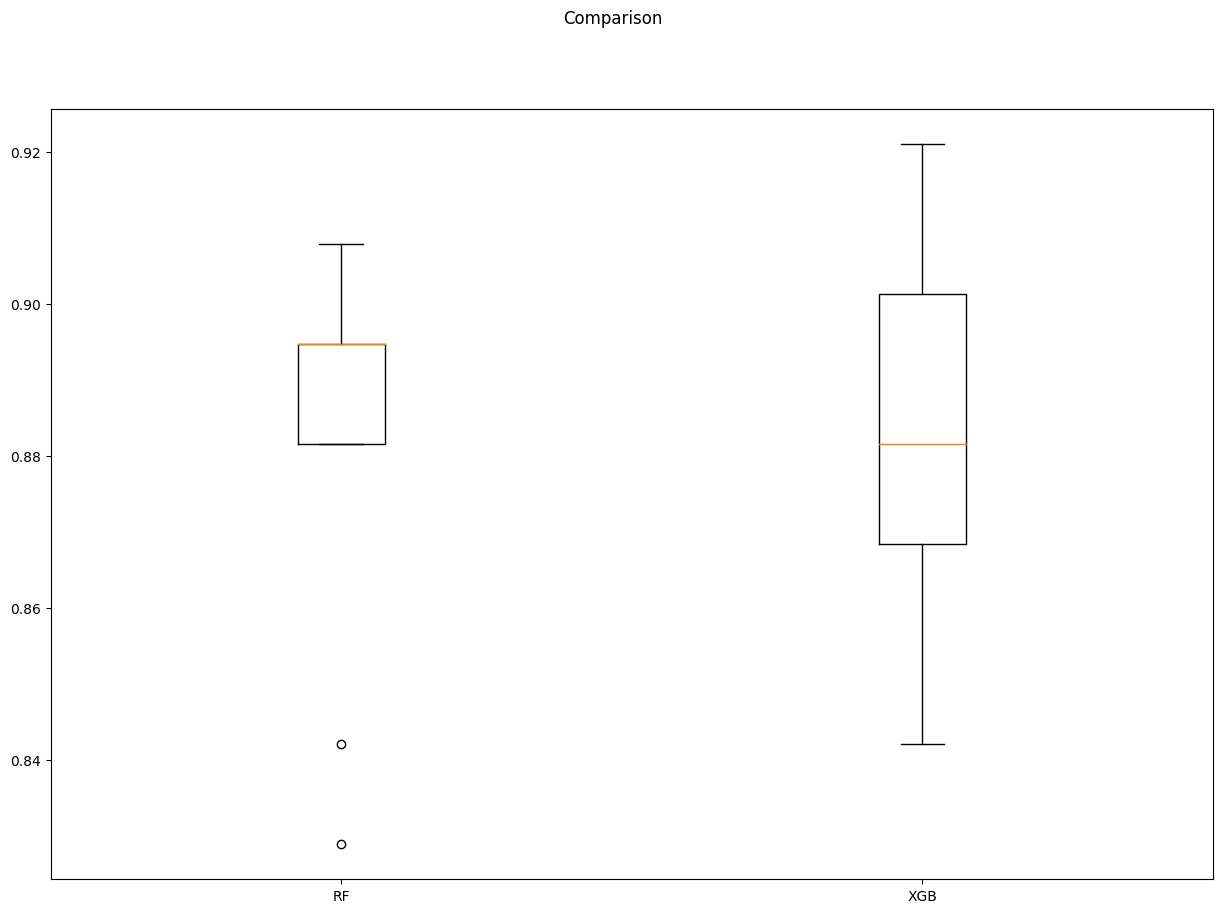

In [57]:
for name, model in models:

        kfold = KFold(n_splits = 10, random_state = None)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Model Tuning -  Random Forest

In [59]:
rf_params={"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [60]:
rf_model = RandomForestClassifier(random_state = 12345)

In [61]:
gs_cv = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [62]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 10,
 'n_estimators': 500}

In [63]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [64]:
rf_tuned = rf_tuned.fit(X,y)

In [65]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8934210526315789

### Model Tuning -  GradientBoosting

In [66]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [69]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [70]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [71]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [72]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.8842105263157893

### Models comparison

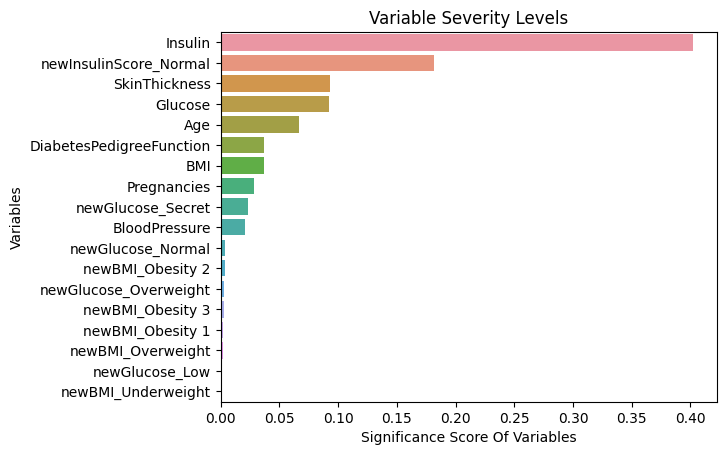

In [73]:
#plot for random forest model

feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

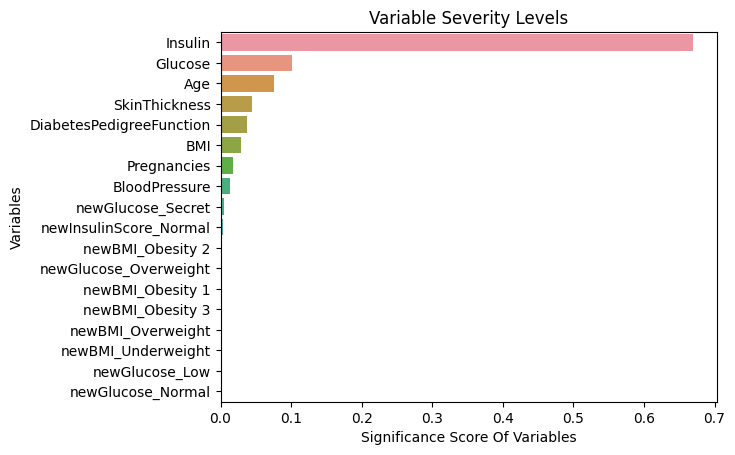

In [74]:
#Plot for GradientBoosting model

feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

In [75]:
#CV comparison of models

models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))

RF: 0.894737 (0.029422)
XGB: 0.890789 (0.025000)


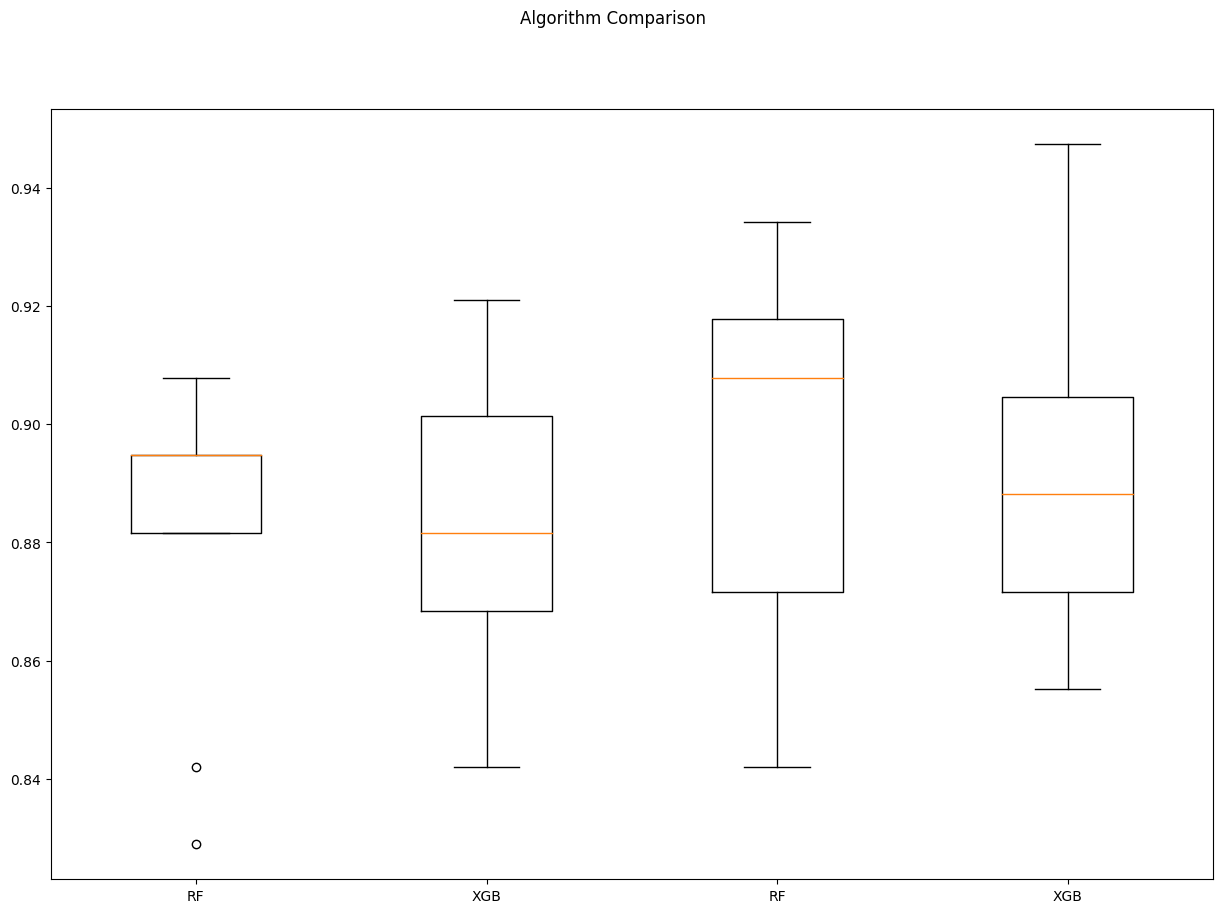

In [77]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = None)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Conclusion:

The models created which are RandomForest and GradientBoosting both have low cross validation scores. But from the tuned models the XGBoost hyperparameter has low cross validation score then of RandomForest.